In [1]:
pip install pandas scikit-learn numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [14]:
data=pd.read_csv("C:\\Users\\cemre\\Desktop\\Dry_Bean_Dataset.csv")

In [15]:
features = data.drop('Class', axis=1)
labels = data['Class']

In [16]:
# Split the dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

In [17]:
# Create a Random Forest classifier with 100 trees
classifier = RandomForestClassifier(n_estimators=100)

# Train the classifier
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [18]:
# Generate predictions
y_pred = classifier.predict(X_test)

In [21]:
# Calculate precision, recall, and F-score  accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f_score = f1_score(y_test, y_pred, average='macro')


print("Random Forest Classifier Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F-score:", f_score)

Random Forest Classifier Accuracy: 0.9204211557296768
Precision: 0.9340026956912065
Recall: 0.9302024571508293
F-score: 0.9320327822685683


In [22]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[356   0  26   0   1   2  10]
 [  0 161   0   0   0   0   0]
 [ 20   0 446   0   8   2   3]
 [  0   0   0 966   2  18  57]
 [  4   0   7   4 559   0  14]
 [  4   0   0  19   0 581  15]
 [  0   0   1  86   9  13 690]]


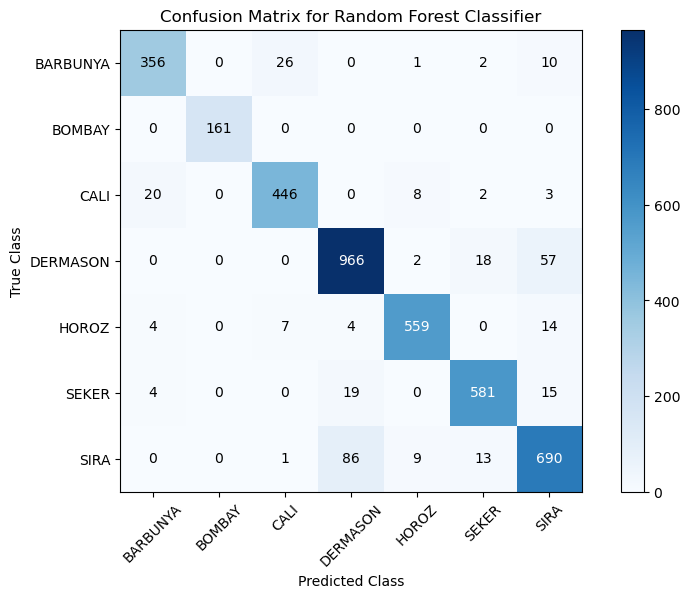

In [23]:
# Create a bar plot for the confusion matrix
plt.figure(figsize=(10, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Random Forest Classifier")
plt.colorbar()
tick_marks = np.arange(len(np.unique(labels)))
plt.xticks(tick_marks, np.unique(labels), rotation=45)
plt.yticks(tick_marks, np.unique(labels))
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

# Add value labels to the plot
thresh = cm.max() / 2
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'), ha='center', va='center',
             color='white' if cm[i, j] > thresh else 'black')

plt.show()